In [35]:
#import libraries 
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy 
import sklearn 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import pylab as pl 

In [36]:
#Import Path
path = r'C:\Users\kanch\Documents\World Happiness Report\02 Data\Cleaned Data'

In [37]:
#open 2015.csv 
df_2015 = pd.read_csv(os.path.join(path, '2015.csv'),index_col = False)


In [38]:
#open 2016.csv
df_2016 = pd.read_csv(os.path.join(path, '2016.csv'),index_col = False)

In [39]:
#open 2017.csv

df_2017 = pd.read_csv(os.path.join(path, '2017.csv'),index_col = False)

In [40]:
#open 2018.csv
df_2018 = pd.read_csv(os.path.join(path, '2018.csv'),index_col = False)

In [41]:
#open 2019.csv

df_2019 = pd.read_csv(os.path.join(path, '2019.csv'),index_col = False)

In [42]:
# Concatenate all DataFrames into one
combined_df = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], ignore_index=True)

In [43]:
combined_df.shape

(782, 17)

In [44]:
#Drop duplicates and handle missing values
combined_df.drop_duplicates(inplace=True)
combined_df.dropna(inplace=True)


In [45]:
# Remove categorical columns
categorical_columns = combined_df.select_dtypes(include=['object']).columns
combined_df = combined_df.drop(columns=categorical_columns)


In [46]:
import pandas as pd

# Assuming you've concatenated your DataFrames into combined_df
combined_df = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], ignore_index=True)

# Check the shape of combined_df after concatenation
print("Shape of combined_df after concatenation:", combined_df.shape)

# Data cleaning and manipulation steps (add these after each step)
# For example, removing duplicates
combined_df.drop_duplicates(inplace=True)

# Check the shape of combined_df after removing duplicates
print("Shape of combined_df after removing duplicates:", combined_df.shape)

# Handle missing values (if applicable)
# combined_df.dropna(inplace=True)

# Check the shape of combined_df after handling missing values (if applied)
# print("Shape of combined_df after handling missing values:", combined_df.shape)


Shape of combined_df after concatenation: (782, 17)
Shape of combined_df after removing duplicates: (782, 17)


In [47]:
from sklearn.preprocessing import StandardScaler

# Specify which columns to standardize (exclude non-numeric columns if necessary)
numeric_columns = combined_df.select_dtypes(include=['number']).columns

# Create a subset of the DataFrame with only the numeric columns
numeric_data = combined_df[numeric_columns]

# Standardize the numeric data
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

# Replace the original numeric columns with the standardized values
combined_df[numeric_columns] = numeric_data_scaled


#Data Exploration and Visualization

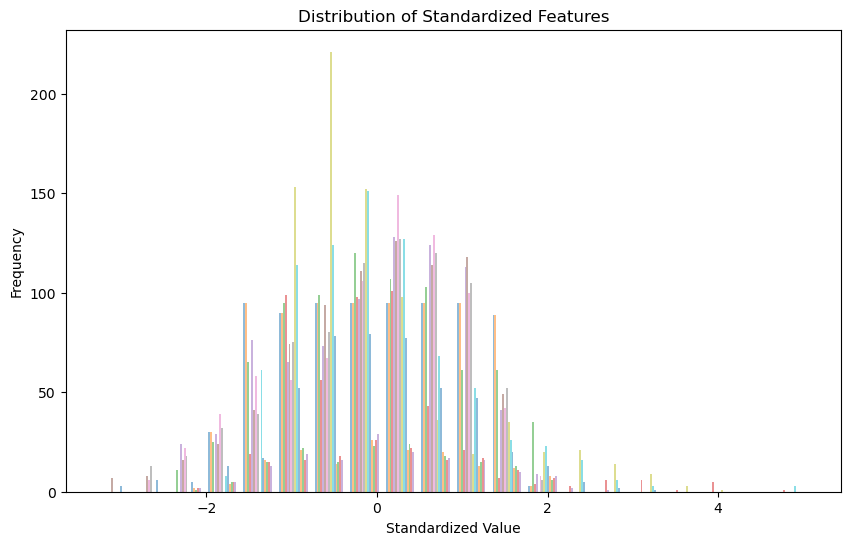

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load and preprocess your data, including concatenation and removing duplicates

# Standardize the numerical columns (excluding non-numeric columns if applicable)
numeric_columns = combined_df.select_dtypes(include=['number']).columns
numeric_data = combined_df[numeric_columns]

# Standardize the numeric data
scaler = StandardScaler()
combined_df_scaled = scaler.fit_transform(numeric_data)

# Visualize standardized features
plt.figure(figsize=(10, 6))
plt.hist(combined_df_scaled, bins=20, alpha=0.5)
plt.xlabel('Standardized Value')
plt.ylabel('Frequency')
plt.title('Distribution of Standardized Features')

# Specify the path to save the plot
export_path = r'C:\Users\kanch\Documents\World Happiness Report\04 Analysis\Visualizations\Distribution of Standardized Features.png'

# Save the plot as an image
plt.savefig(export_path)

# Show the plot (optional)
plt.show()


#Based on the graph, the distribution of standardized features appears to be approximately normal, symmetric, with no significant skewness, and it has a single mode. This is a typical characteristic of a standard normal distribution, which is expected after standardizing data.

In [49]:
# Identify missing values in combined_df
missing_values = combined_df.isna().sum()
print(missing_values)


Unnamed: 0                     0
Country                        0
Region                       467
Happiness Rank                 0
Happiness Score                0
Standard Error               312
GDP                            0
Family                         0
Health                         0
Freedom                        0
Trust                          0
Generosity                     0
Dystopia Residual            312
Lower Confidence Interval    625
Upper Confidence Interval    625
Whisker high                 627
Whisker low                  627
dtype: int64


#Handling missing values

In [50]:
# Replace missing values with the mean of each column
combined_df.fillna(combined_df.mean(), inplace=True)


C:\Users\kanch\AppData\Local\Temp\ipykernel_6132\2034603667.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  combined_df.fillna(combined_df.mean(), inplace=True)


#Identify and Remove Non-Numeric Columns: Identify the non-numeric columns in your DataFrame (e.g., columns with strings or categorical data) and remove them before standardization.

In [51]:
# Assuming 'combined_df' contains your data
numeric_columns = combined_df.select_dtypes(include=['number']).columns
numeric_data = combined_df[numeric_columns]


In [52]:
#Standardize the Numeric Data: Apply StandardScaler to the numeric data.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)


In [53]:
#Combine the Standardized Numeric Data with Non-Numeric Data: If you need to keep the non-numeric columns for further analysis or visualization, you can concatenate the standardized numeric data with the non-numeric columns.

# Assuming 'combined_df' contains non-numeric columns
non_numeric_data = combined_df.drop(columns=numeric_columns)

# Combine the standardized numeric data with non-numeric data
combined_data_scaled = pd.concat([non_numeric_data, pd.DataFrame(numeric_data_scaled, columns=numeric_columns)], axis=1)


#Standardize Data

In [54]:
from sklearn.preprocessing import StandardScaler

# Identify and select numerical columns
numeric_columns = combined_df.select_dtypes(include=['number']).columns

# Create a subset of the DataFrame with only the numerical columns
numeric_data = combined_df[numeric_columns]

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the numerical data
numeric_data_scaled = scaler.fit_transform(numeric_data)

# Replace the original numerical columns with the standardized values
combined_df[numeric_columns] = numeric_data_scaled


#Apply k-means

In [55]:
from sklearn.cluster import KMeans

# Choose the number of clusters (k)
k = 3  # choose the appropriate number of clusters based on your problem

# Initialize the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to your standardized data
kmeans.fit(numeric_data_scaled)  # Use the standardized numerical data

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to your DataFrame, if needed
combined_df['Cluster'] = cluster_labels


C:\Users\kanch\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kanch\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


# Elbow Technique

C:\Users\kanch\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kanch\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\kanch\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kanch\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

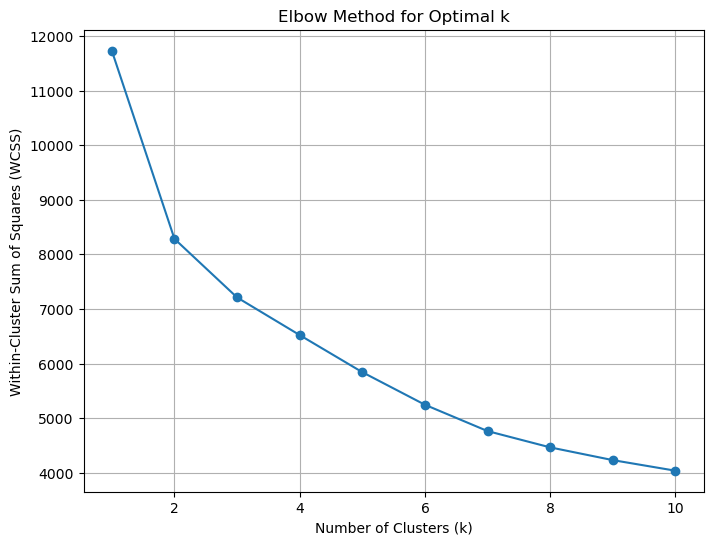

In [56]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Initialize a list to store the WCSS values for different k
wcss = []

# Define a range of values for k (number of clusters)
k_values = range(1, 11)

# Calculate WCSS for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numeric_data_scaled)  # Use the standardized numerical data
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters (k)
plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)

# Specify the path to save the plot
export_path = r'C:\Users\kanch\Documents\World Happiness Report\04 Analysis\Visualizations\'Elbow Method for Optimal k.png'

# Save the plot as an image
plt.savefig(export_path)

# Show the plot (optional)
plt.show()


#The main objective of creating an Elbow Method graph is to identify the "elbow" point, which is the point where the rate of decrease in WCSS starts to slow down. This point is often indicative of the optimal number of clusters.As you can see, the WCSS decreases as you increase the number of clusters (k). This is expected because when you have more clusters, data points tend to be closer to their respective cluster centers, leading to a lower WCSS.

In [57]:
# Identify missing values in combined_df
missing_values = combined_df.isna().sum()
print(missing_values)


Unnamed: 0                     0
Country                        0
Region                       467
Happiness Rank                 0
Happiness Score                0
Standard Error                 0
GDP                            0
Family                         0
Health                         0
Freedom                        0
Trust                          0
Generosity                     0
Dystopia Residual              0
Lower Confidence Interval      0
Upper Confidence Interval      0
Whisker high                   0
Whisker low                    0
Cluster                        0
dtype: int64


# Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart.
Explain why you chose that number in a markdown cell.
If you run into any problems determining the optimal number of clusters using the elbow technique, reach out to your tutor for suggestions.


#Based on the elbow method chart, it appears that there isn't a clear and distinct "elbow" point where the rate of decrease in the within-cluster sum of squares (WCSS) sharply slows down. However, we can still make an informed decision about the number of clusters by analyzing the chart and considering the context of the data.

 The choice of the number of clusters can be somewhat subjective and context-dependent.You can experiment with different values of k and evaluate the results. For example, you can try a few values of k (e.g., 2, 3, 4, 5) and examine how well the resulting clusters align with your expectations or goals.

# Run the k-means algorithm.

In [58]:
from sklearn.cluster import KMeans

# Choose the number of clusters (k)
k = 3

# Initialize the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to your standardized data (numeric_data_scaled)
kmeans.fit(numeric_data_scaled)  # Use the standardized numerical data

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to your DataFrame, if needed
combined_df['Cluster'] = cluster_labels


C:\Users\kanch\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kanch\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


# Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.

In [59]:
# Add the 'Cluster' column to your DataFrame
combined_df['Cluster'] = cluster_labels

# Now, your DataFrame 'combined_df' contains the 'Cluster' column with cluster assignments


In [60]:
#Check Cluster Column 
combined_df.head

<bound method NDFrame.head of      Unnamed: 0                   Country          Region  Happiness Rank  \
0     -1.720865               Switzerland  Western Europe       -1.720758   
1     -1.698719                   Iceland  Western Europe       -1.698611   
2     -1.676572                   Denmark  Western Europe       -1.676464   
3     -1.654426                    Norway  Western Europe       -1.654318   
4     -1.632279                    Canada   North America       -1.632171   
..          ...                       ...             ...             ...   
777    1.623273                    Rwanda             NaN        1.623392   
778    1.645420                  Tanzania             NaN        1.645538   
779    1.667566               Afghanistan             NaN        1.667685   
780    1.689713  Central African Republic             NaN        1.689832   
781    1.711859               South Sudan             NaN        1.711978   

     Happiness Score  Standard Error       GD

In [61]:
#count the clusers 
combined_df['Cluster'].value_counts()

0    343
2    276
1    163
Name: Cluster, dtype: int64

# Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

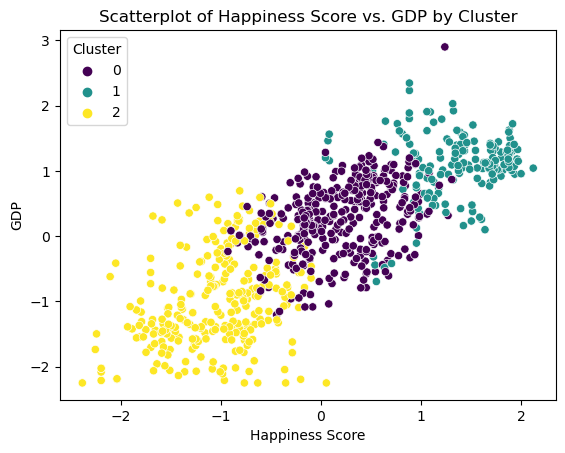

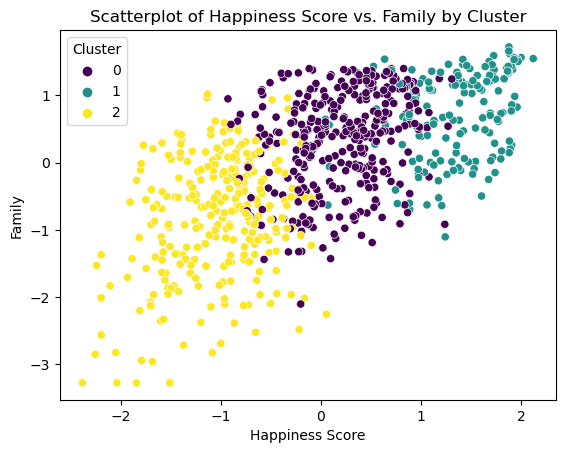

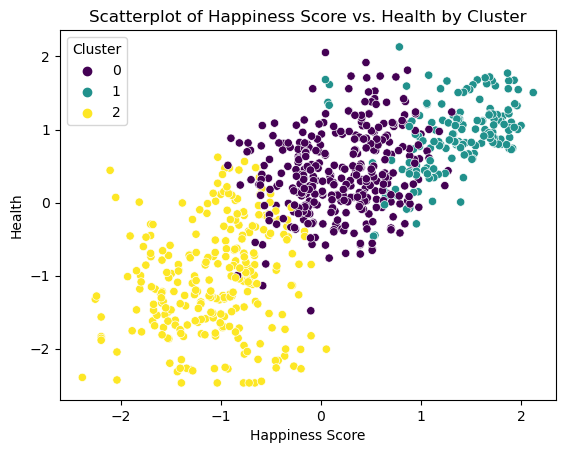

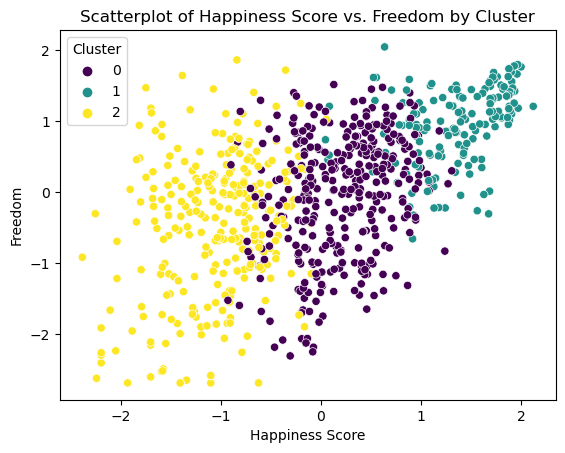

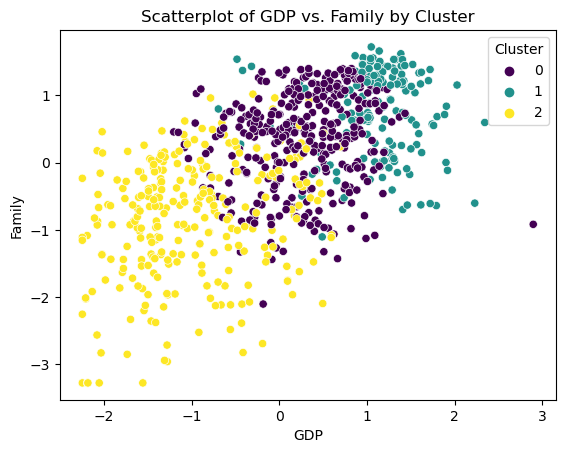

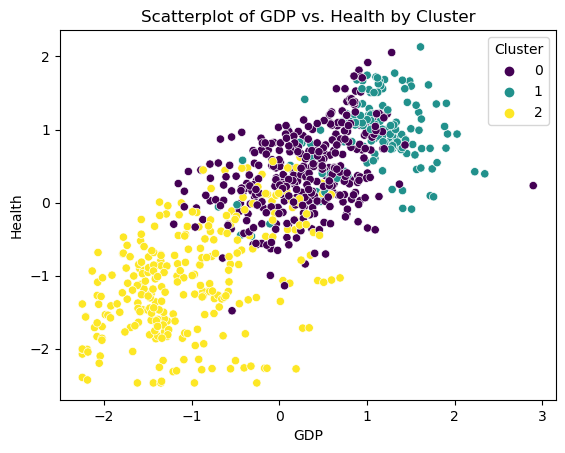

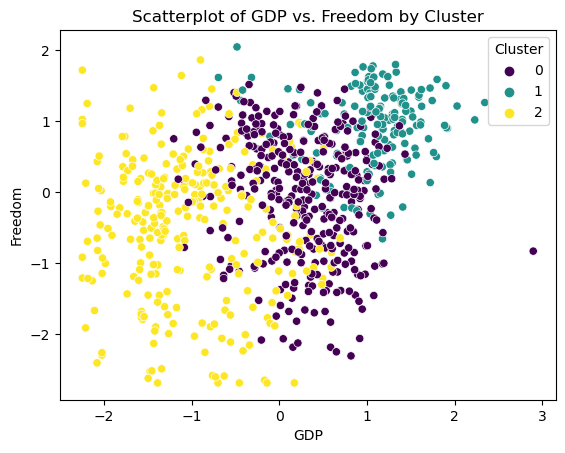

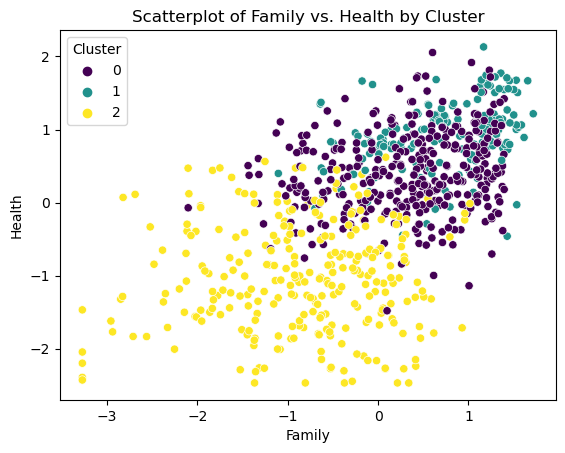

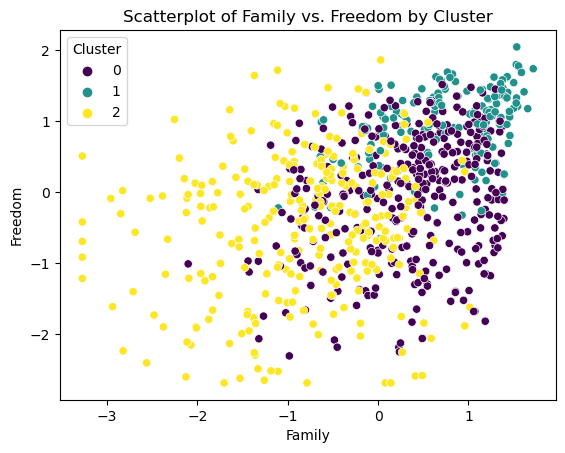

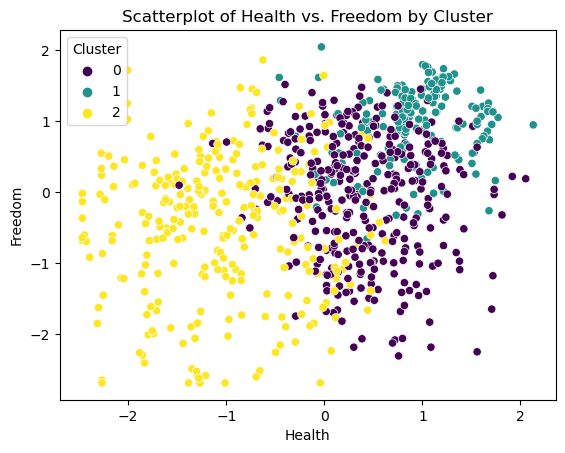

In [62]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Select variables without missing values
selected_variables = ['Happiness Score', 'GDP', 'Family', 'Health', 'Freedom', 'Cluster']

# Create a directory to save the visualizations (if it doesn't exist)
export_path = r'C:\Users\kanch\Documents\World Happiness Report\04 Analysis\Visualizations'

# Loop through variable pairs and create scatterplots
for i in range(len(selected_variables) - 1):
    for j in range(i + 1, len(selected_variables) - 1):
        variable_x = selected_variables[i]
        variable_y = selected_variables[j]

        # Scatterplot colored by cluster
        sns.scatterplot(data=combined_df, x=variable_x, y=variable_y, hue='Cluster', palette='viridis')
        plt.title(f'Scatterplot of {variable_x} vs. {variable_y} by Cluster')

        # Save the plot as an image in the specified path (e.g., PNG format)
        plot_filename = f'{variable_x}_vs_{variable_y}_by_Cluster.png'
        plot_filepath = os.path.join(export_path, plot_filename)
        plt.savefig(plot_filepath)

        # Show the plot (optional)
        plt.show()




#These scatterplots are valuable for visualizing how the selected variables relate to each other within different clusters. By examining these plots, you can gain insights into the distribution and relationships of variables in data, especially when considering the clustering results.Cluster 0 is a group of data points that share certain commonalities or patterns.Cluster 1 represents another group of data points with distinct characteristics. Cluster 2 is another distinct group of data points with its own set of commonalities or patterns. Data points in Cluster 2 are more similar to each other than to data points in the other clusters.

# Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.
Note down your thoughts in a markdown cell.

Why Clusters May Not Make Sense:

Inadequate Features: If the features used for clustering do not capture meaningful distinctions in the data, the resulting clusters may not make sense. In such cases, consider revisiting the feature selection process or exploring additional variables.

Noise in Data: Noise or outliers in the data can disrupt the clustering process and lead to less meaningful clusters. Preprocessing steps like outlier removal may be necessary.

Inappropriate Number of Clusters (k): Choosing an inappropriate value for k can lead to suboptimal or confusing clusters. Make sure the selected value of k aligns with the underlying structure of the data.

Complex Data Patterns: Some datasets may have complex or overlapping patterns that are difficult to capture with clustering algorithms. In such cases, alternative techniques or more sophisticated clustering methods may be required.

In [63]:
# Group the data by the "Cluster" column and calculate descriptive statistics for each cluster
cluster_stats = combined_df.groupby('Cluster').agg({
    'Happiness Score': ['mean', 'median', 'std'],
    'GDP': ['mean', 'median', 'std'],
    'Family': ['mean', 'median', 'std'],
    'Health': ['mean', 'median', 'std'],
    'Freedom': ['mean', 'median', 'std']
})

# Rename the columns for clarity
cluster_stats.columns = ['Happiness Score Mean', 'Happiness Score Median', 'Happiness Score Std',
                          'GDP Mean', 'GDP Median', 'GDP Std',
                          'Family Mean', 'Family Median', 'Family Std',
                          'Health Mean', 'Health Median', 'Health Std',
                          'Freedom Mean', 'Freedom Median', 'Freedom Std']

# Display the descriptive statistics for each cluster
print(cluster_stats)


         Happiness Score Mean  Happiness Score Median  Happiness Score Std  \
Cluster                                                                      
0                    0.203433                0.231627             0.454550   
1                    1.351361                1.390728             0.435226   
2                   -1.050904               -0.972738             0.482325   

         GDP Mean  GDP Median   GDP Std  Family Mean  Family Median  \
Cluster                                                               
0        0.289336    0.314908  0.547609     0.336048       0.450260   
1        1.086438    1.129883  0.500779     0.725889       0.795650   
2       -1.001202   -1.100982  0.716156    -0.846321      -0.720181   

         Family Std  Health Mean  Health Median  Health Std  Freedom Mean  \
Cluster                                                                     
0          0.708965     0.400170       0.352950    0.556027     -0.055293   
1          0.635335   

#Discussion:

Cluster 0 appears to represent a group of countries with moderate happiness scores, relatively lower GDP and family scores, and mixed health and freedom scores. These countries may have moderate overall well-being but lower economic and social indicators.

Cluster 1 represents countries with the highest happiness scores, strong GDP, family, health, and freedom scores. These countries likely represent the happiest and most prosperous nations.

Cluster 2 consists of countries with the lowest happiness scores, lower GDP, family, health, and freedom scores. These countries may face greater challenges in terms of well-being and development.

# Propose what these results could be useful for in future steps of an analytics pipeline.

clustering results serve as a foundation for more advanced analytics and decision-making processes. They help organizations move from raw data to actionable insights, enabling more effective and targeted strategies across various domains and industries.

In [65]:
# Specify the file path where you want to save the Excel file
excel_file_path = r'C:\Users\kanch\Documents\World Happiness Report\02 Data\Prepared Data.xlsx'  # Replace with your desired file path

# Export the DataFrame to an Excel file
combined_df.to_excel(excel_file_path, index=False)  # Set index to False if you don't want to save the index

print("DataFrame has been exported to Excel successfully.")



DataFrame has been exported to Excel successfully.
